In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape


(768, 9)

In [ ]:
print(df.columns.values) # return an array of column names

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [ ]:
print(df.columns.values.tolist())  # return a list of column names

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
df.isnull().any().sum()

2

In [ ]:
df.isnull().any() 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.isnull().values.any() 

True

In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               14
Insulin                     11
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64




**Cleaning Data**




**Cleaning Empty cells:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dirtydata.csv to dirtydata.csv


In [ ]:
df = pd.read_csv('dirtydata.csv')

df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [ ]:
new_df = df.dropna()  #By default, the dropna() method returns a new DataFrame, and will not change the original. 
                        #to change the original DataFrame, use the inplace = True 
print(new_df.to_string())

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

**dataframe.fillna(value, method, axis, inplace, limit, downcast) **

method: ffill/bfill

axis: 0/index,1/column

inplace : false/true

limit :none. If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill.only partially filled, if missing values are more than the specified value

Dictionary
None	Optional, a dictionary of values to fill for specific data types



In [ ]:
df1=df.fillna(0)   #rows 22,18,28 gets replaced with 130 , inplace=True (will be changed in original df)
df1

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [ ]:
df2=df["Calories"].fillna(130)
df2

0     409.1
1     479.0
2     340.0
3     282.4
4     406.0
5     300.0
6     374.0
7     253.3
8     195.1
9     269.0
10    329.3
11    250.7
12    250.7
13    345.3
14    379.3
15    275.0
16    215.2
17    300.0
18    130.0
19    323.0
20    243.0
21    364.2
22    282.0
23    300.0
24    246.0
25    334.5
26    250.0
27    241.0
28    130.0
29    280.0
30    380.3
31    243.0
Name: Calories, dtype: float64

In [ ]:
df_copy=df.copy()
df_copy


,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [ ]:
df_mean=df["Calories"].mean()
#df_mean      # mean value for Calories is 304.68
df_copy["Calories"].fillna(df_mean, inplace=True)  #rows 18,28 repleced with mean vlaue  , Same thing can be done for median(),mode()
df_copy


,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.10
1,60,'2020/12/02',117,145,479.00
2,60,'2020/12/03',103,135,340.00
3,45,'2020/12/04',109,175,282.40
4,45,'2020/12/05',117,148,406.00
5,60,'2020/12/06',102,127,300.00
6,60,'2020/12/07',110,136,374.00
7,450,'2020/12/08',104,134,253.30
8,30,'2020/12/09',109,133,195.10
9,60,'2020/12/10',98,124,269.00


In [ ]:
df_copymode=df.copy()
df_copymode

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [ ]:
df_mode=df_copymode["Calories"].mode()[0]    #Because if multiple values with same maximum occurencies mode return all values  for first mode value use indexing
#df_mode    # mode value for Calories is 300
df_copymode["Calories"].fillna(df_mode, inplace=True)  #rows 18,28 repleced with mean vlaue  , Same thing can be done for median(),mode()
df_copymode

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [ ]:
df_copymode['Date'] = pd.to_datetime(df_copymode['Date'])  #26th record converted to date format
print(df_copymode)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
18        45 2020-12-18     90 

In [ ]:
df_copymode.dropna(subset=['Date'], inplace = True)    # row 22 removed
df_copymode

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


In [ ]:
for x in df_copymode.index:
  if df_copymode.loc[x, "Duration"] > 120:
    df_copymode.drop(x, inplace = True)   #row 7 removed
df_copymode  

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0
10,60,2020-12-11,103,147,329.3


In [ ]:
df_copymode.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [ ]:
df_copymode.drop_duplicates(inplace=True)   #row 12 removed
df_copymode

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0
10,60,2020-12-11,103,147,329.3


In [ ]:
df1=df.fillna(0)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0.0,0.0,33.6,0.627,50,1
1,1,85,66,0.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
df1=df.fillna(value=0,axis=1)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0.0,0.0,33.6,0.627,50,1
1,1,85,66,0.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
df1=df.fillna({'Insulin':'100'})
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,NaN,100,33.6,0.627,50,1
1,1,85,66,NaN,100,26.6,0.351,31,0
2,8,183,64,NaN,100,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
All = df.shape[0]
dia = df[df['Outcome'] == 1]
nodia = df[df['Outcome'] == 0]

x = len(dia)/All
y = len(nodia)/All

print('with diabetes :',x*100,'%')
print('non diabetes :',y*100,'%')

with diabetes : 34.89583333333333 %
non diabetes : 65.10416666666666 %


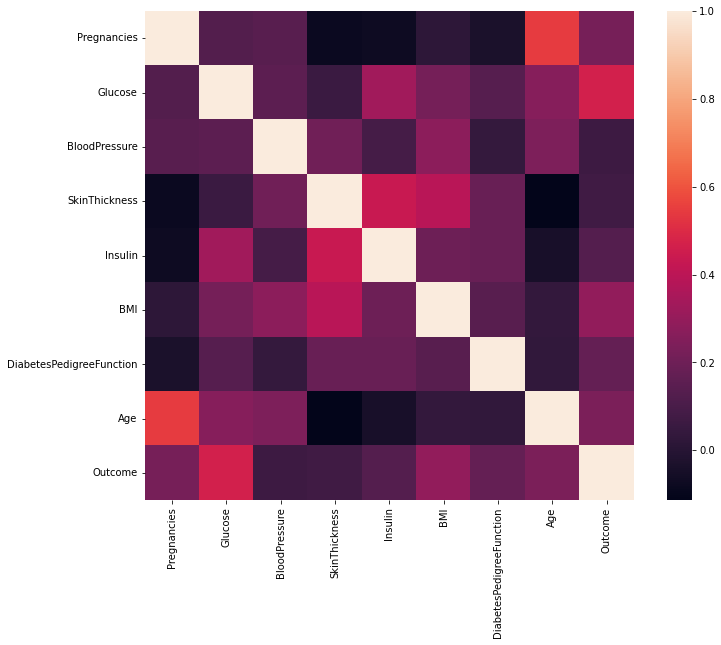

In [ ]:
correlation_matrix = df.corr()   # creates correlation matrix
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,square=True)
plt.show()

In [ ]:
object = StandardScaler()
object.fit_transform(df)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Outcome
0,-75.714655,-35.950783,1
1,-82.358268,28.908213,0
2,-74.630643,-67.906496,1
3,11.077423,34.898486,0
4,89.743788,-2.746937,1


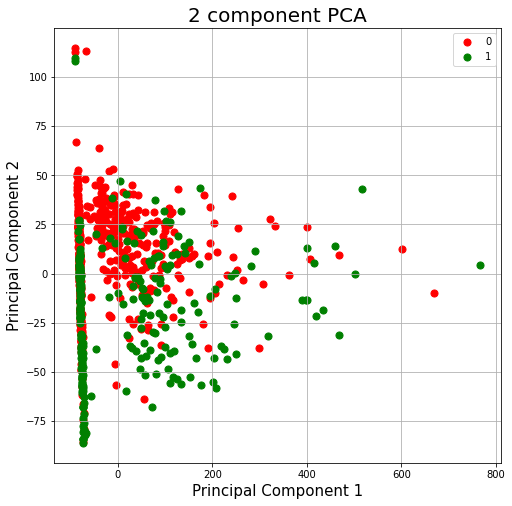

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
features = df.drop(['Outcome'], axis = 1)
labels = pd.DataFrame(df['Outcome'])

feature_array = features.values
label_array = labels.values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)